In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from pprint import pprint


In [41]:
data_dir = r"C:\Users\yrliu98\Desktop\2025_04_04_Cyerene_test"

txt_files = list(Path(data_dir).glob('*.txt'))

pprint(txt_files)

[WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/Cyrene_100C_front.txt'),
 WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/Cyrene_CB_back.txt'),
 WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/Cyrene_CB_front.txt'),
 WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/Cyrene_RT_front.txt'),
 WindowsPath('C:/Users/yrliu98/Desktop/2025_04_04_Cyerene_test/rac_ACN_front.txt')]


In [44]:
dfs = []
for txt_file in txt_files:
    df = pd.read_csv(txt_file, sep="\t", names=["wavelength", "CD", "HT", "abs"], skiprows=21, nrows=400)
    dfs.append({"name": txt_file.stem, **df.to_dict(orient='list'), "df":df })

double_side_samples = [df['df'] for df in dfs if ("Cyrene_CB_" in df["name"])]

genuine_df = double_side_samples[0].merge(double_side_samples[1], on="wavelength")

genuine_df["genuine_CD"] = (genuine_df["CD_x"] + genuine_df["CD_y"]) / 2

to_exclude = [0, 1, 2, 3]

for i in sorted(to_exclude, reverse=True):
    dfs.pop(i)

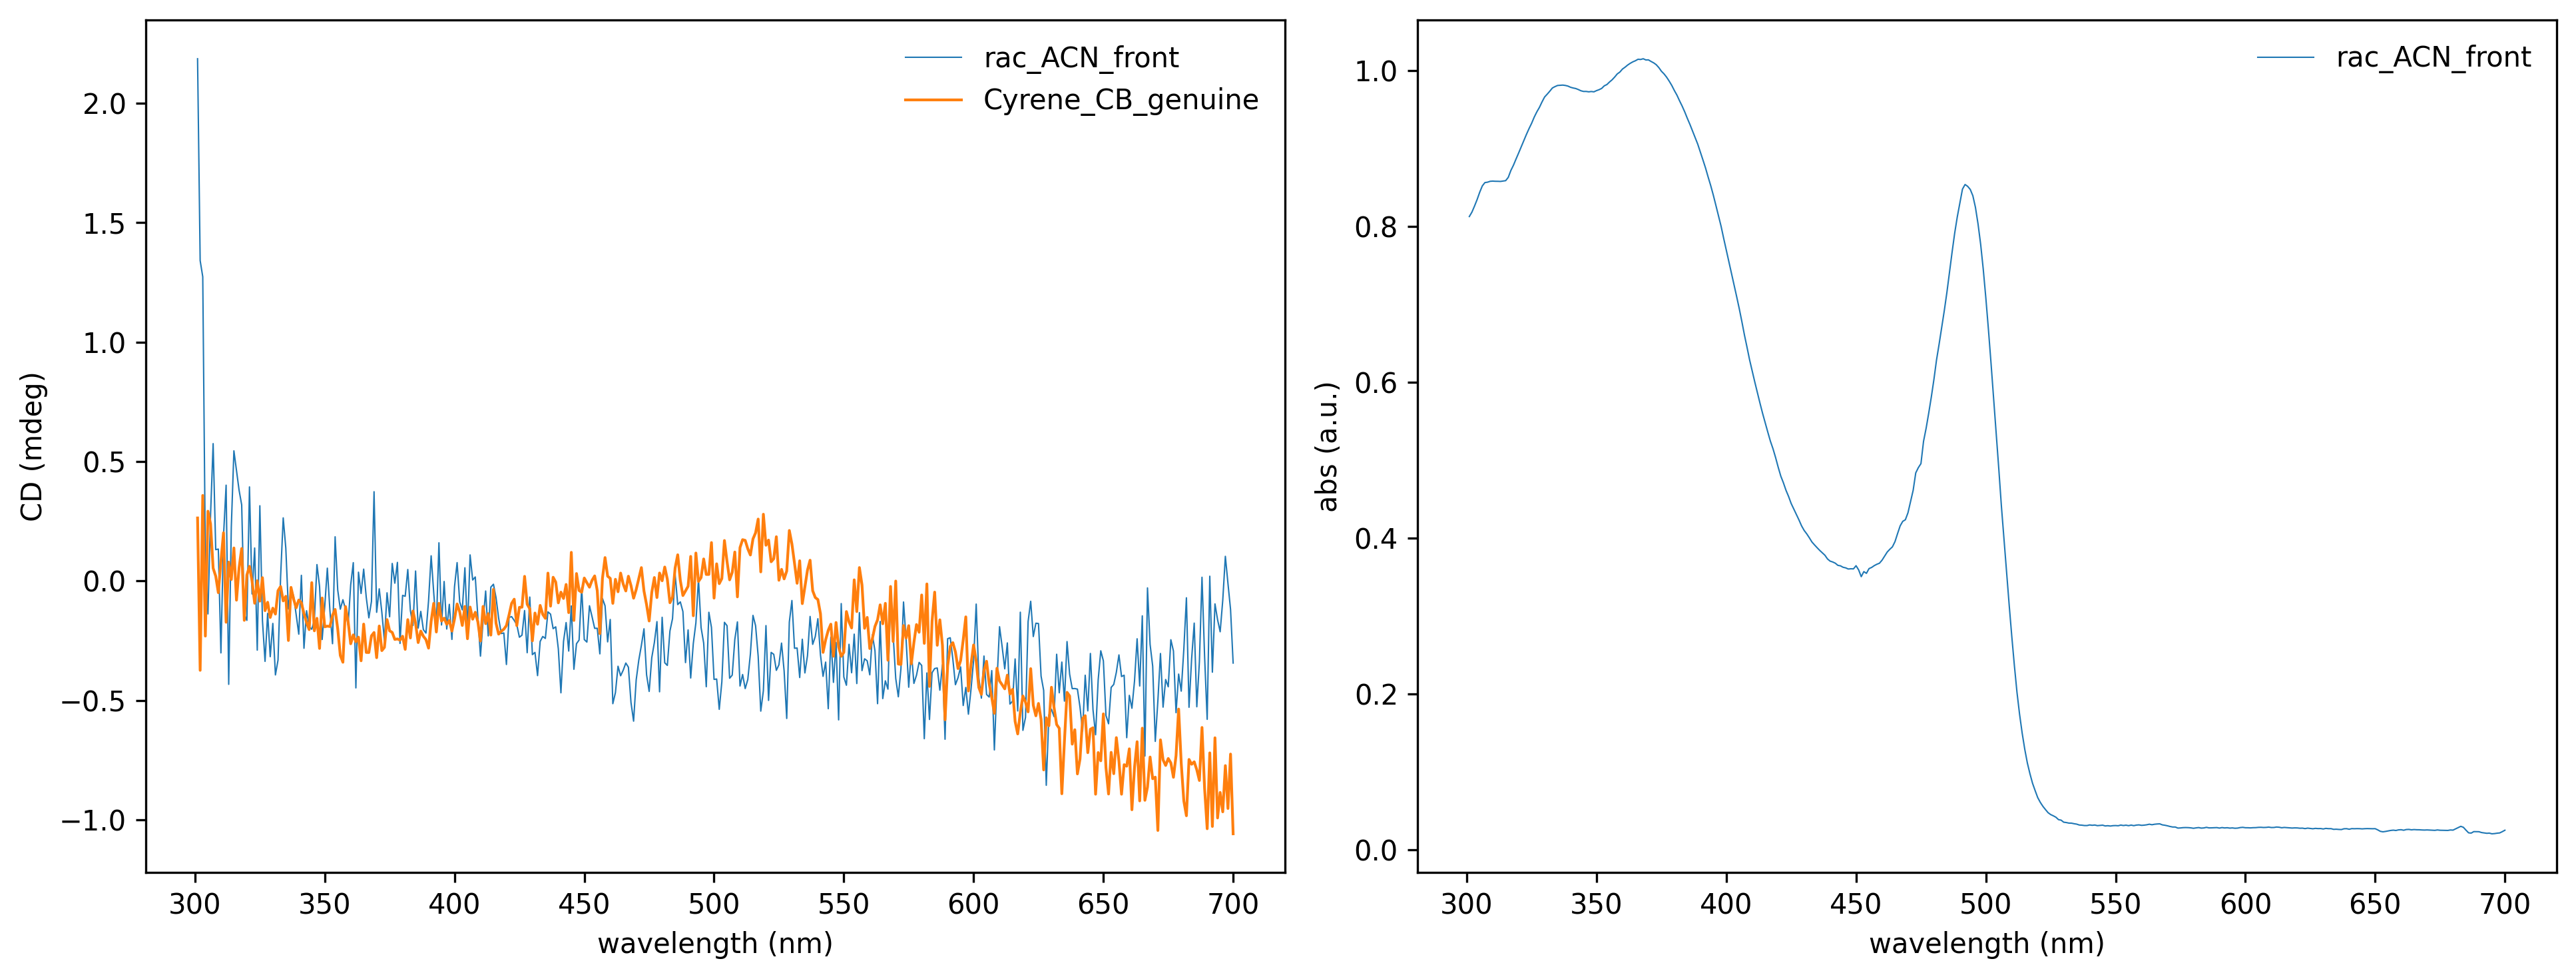

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5), dpi=300, layout="tight")

for df in dfs:
    axs[0].plot(df["wavelength"], df["CD"], label=df["name"], lw=0.5)

axs[0].plot(genuine_df["wavelength"], genuine_df["genuine_CD"], label="Cyrene_CB_genuine", lw=1)

handles, labels = axs[0].get_legend_handles_labels()
order = [4, 0, 3, 2, 1, 5]
if len(order) == len(dfs):
    axs[0].legend([handles[idx] for idx in order], [labels[idx] for idx in order], frameon=False)
else:
    axs[0].legend(frameon=False)

axs[0].set_xlabel("wavelength (nm)")
axs[0].set_ylabel("CD (mdeg)")

for df in dfs:
    axs[1].plot(df["wavelength"], df["abs"], label=df["name"], lw=0.5)
    axs[1].legend(frameon=False)

axs[1].set_xlabel("wavelength (nm)")
axs[1].set_ylabel("abs (a.u.)")

fig.savefig(Path(data_dir, "ACN_CB_plot.jpg"))
